![image.png](attachment:image.png)

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# carregando os dados
X_train = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/X_train_new.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/X_test_new.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None, names=['action'])
y_test = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None, names=['action'])

### 2. Calcule os ```ccp_alphas```.

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [4]:
%%time
cols = ['tGravityAcc-min()-X', 'fBodyAcc-mad()-X', 'tGravityAcc-mean()-Y']

X_train = X_train[cols]
X_test  = X_test [cols]

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

clf = DecisionTreeClassifier(min_samples_leaf=20,
                             random_state=42)
path = clf.cost_complexity_pruning_path(X=X_train,
                                        y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

print('Quantidade de ccp_alphas:', ccp_alphas.size)

X_train: (7352, 3)
y_train: (7352, 1)
X_test: (2947, 3)
y_test: (2947, 1)
Quantidade de ccp_alphas: 108
CPU times: user 32.4 ms, sys: 516 µs, total: 32.9 ms
Wall time: 44.1 ms


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [5]:
%%time

clf = DecisionTreeClassifier(random_state=42)

grid_parametros = {'ccp_alpha': ccp_alphas[::10]}

grid = GridSearchCV(estimator=clf,
                    param_grid=grid_parametros,
                    cv=10,
                    verbose=1)
grid.fit(X_train, y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.sort_values(by='rank_test_score')

Fitting 10 folds for each of 11 candidates, totalling 110 fits
CPU times: user 2.72 s, sys: 0 ns, total: 2.72 s
Wall time: 2.72 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
10,0.020316,0.001251,0.003596,0.000380,0.007078,{'ccp_alpha': 0.0070780153685231426},0.815217,0.868207,0.872109,0.783673,0.817687,0.800000,0.835374,0.783673,0.870748,0.733333,0.818002,0.042883,1
9,0.020604,0.001533,0.003666,0.000491,0.002185,{'ccp_alpha': 0.0021848127801104567},0.832880,0.819293,0.873469,0.771429,0.733333,0.753741,0.824490,0.717007,0.869388,0.779592,0.797462,0.051871,2
0,0.020415,0.001452,0.004433,0.001059,0.0,{'ccp_alpha': 0.0},0.830163,0.763587,0.831293,0.697959,0.759184,0.765986,0.824490,0.816327,0.825850,0.761905,0.787674,0.042328,3
1,0.019395,0.000449,0.003587,0.000253,0.00001,{'ccp_alpha': 1.043854543614182e-05},0.830163,0.763587,0.831293,0.697959,0.759184,0.765986,0.824490,0.816327,0.825850,0.761905,0.787674,0.042328,3
2,0.019554,0.000543,0.003556,0.000415,0.00004,{'ccp_alpha': 3.958987221204372e-05},0.830163,0.763587,0.831293,0.697959,0.759184,0.765986,0.824490,0.816327,0.825850,0.761905,0.787674,0.042328,3
3,0.019863,0.000918,0.004313,0.001589,0.000095,{'ccp_alpha': 9.476270433879971e-05},0.830163,0.763587,0.831293,0.697959,0.759184,0.765986,0.824490,0.816327,0.825850,0.761905,0.787674,0.042328,3
4,0.020227,0.000731,0.004042,0.001205,0.000229,{'ccp_alpha': 0.00022878203135276082},0.835598,0.750000,0.835374,0.697959,0.763265,0.752381,0.839456,0.810884,0.824490,0.764626,0.787403,0.045812,7
5,0.020279,0.000699,0.003962,0.000595,0.000376,{'ccp_alpha': 0.00037627435359345075},0.804348,0.760870,0.844898,0.691156,0.751020,0.746939,0.832653,0.808163,0.839456,0.779592,0.785909,0.046635,8
8,0.020220,0.000435,0.003918,0.000488,0.0012,{'ccp_alpha': 0.0012000237543503187},0.778533,0.755435,0.821769,0.731973,0.742857,0.768707,0.835374,0.706122,0.851701,0.795918,0.778839,0.044798,9
6,0.020575,0.001017,0.004175,0.000709,0.000489,{'ccp_alpha': 0.0004893467050404673},0.760870,0.771739,0.819048,0.689796,0.755102,0.751020,0.810884,0.805442,0.834014,0.775510,0.777343,0.040029,10


In [6]:
# melhor_ccp = resultados.iloc[grid.best_index_, 4]
melhor_ccp = resultados.iloc[grid.best_index_]['param_ccp_alpha']

print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid.best_score_)
print('\t param_ccp_alpha:', melhor_ccp)


 rank_test_score vencedor:
	 mean_test_score: 0.818002255249926
	 param_ccp_alpha: 0.0070780153685231426


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Parâmetro                    Valor
ccp_alpha                 0.007078
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.7380386834068544


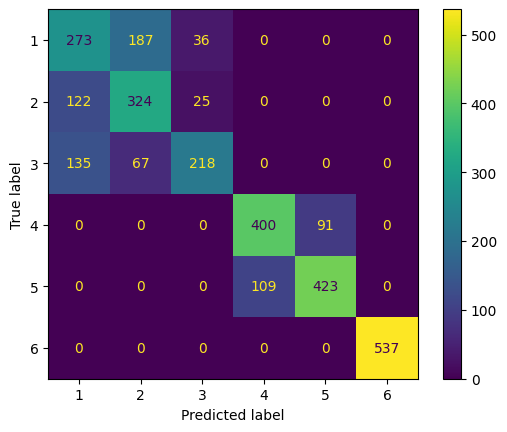

CPU times: user 317 ms, sys: 102 ms, total: 419 ms
Wall time: 337 ms


In [14]:
%%time

clf = DecisionTreeClassifier(random_state=42,
                             ccp_alpha=melhor_ccp
                            ).fit(X_train, y_train)
print(pd.DataFrame(data=clf.get_params(),
                   index=pd.Index(data=['Valor'],
                                  name='Parâmetro')
                  ).T,
      '\n')

print('Acurácia da árvore na base de testes:',
      clf.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                      X=X_test,
                                      y=y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [20]:
%%time

# gerando matriz de confusão com acertos e erros
matriz = confusion_matrix(y_true=y_test,
                          y_pred=clf.predict(X_test))

acertos = [matriz[x,x] for x in range(6)]
erros   = sum(matriz) - acertos

pd.DataFrame(data={'acertos':acertos,
                   'erros':erros},
             index=pd.Index(data=list(range(1,7)),
                            name='classe')
            ).sort_values(by='erros',
                          ascending=False)

CPU times: user 8.58 ms, sys: 943 µs, total: 9.52 ms
Wall time: 9.72 ms


,acertos,erros
classe,,
1,273,257
2,324,254
4,400,109
5,423,91
3,218,61
6,537,0


In [21]:
print(y_train.value_counts().sort_index())

action
1         1226
2         1073
3          986
4         1286
5         1374
6         1407
dtype: int64


In [23]:
y_train_2 = pd.Series(data=(y_train['action'] == 2),
                      name='classe_2')
y_train_2.value_counts()

False    6279
True     1073
Name: classe_2, dtype: int64

In [27]:
%%time
#testando novas variáveis
clf_2 = DecisionTreeClassifier(min_samples_leaf=20,
                               max_depth=4,
                               random_state=42).fit(X=X_train,
                                                    y=y_train_2)

melhores_classe2 = (pd.DataFrame(data={'var': X_train.columns,
                                       'feature_importances_': clf_2.feature_importances_})
                      .sort_values(by='feature_importances_',
                                   ascending=False))
cols_classe2 = melhores_classe2['var'].values[:3]
print('3 melhores variáveis:', cols_classe2, '\n')

cols_2 = cols + cols_classe2.tolist()
X_train = X_train[cols_2]
X_test = X_test[cols_2]


3 melhores variáveis: ['tGravityAcc-mean()-Y' 'fBodyAcc-mad()-X' 'fBodyAcc-mad()-X'] 

CPU times: user 28.2 ms, sys: 836 µs, total: 29 ms
Wall time: 66.5 ms


In [29]:
%%time

#aplicando o gridsearch
clf_2 = DecisionTreeClassifier(random_state=42)
path_2 = clf_2.cost_complexity_pruning_path(X=X_train,
                                            y=y_train)
ccp_alphas_2, impurities_2 = path_2.ccp_alphas, path_2.impurities
ccp_alphas_2 = np.unique(ccp_alphas_2[ccp_alphas_2 >= 0])

clf_2 = DecisionTreeClassifier(random_state=42)
grid_2 = GridSearchCV(estimator=clf_2,
                      param_grid={'ccp_alpha': ccp_alphas_2[::10]},
                      cv=10,
                      verbose=1)
grid_2.fit(X_train, y_train)

resultados_2 = pd.DataFrame(grid_2.cv_results_)
resultados_2.sort_values(by='rank_test_score').head()

Fitting 10 folds for each of 26 candidates, totalling 260 fits
CPU times: user 18.6 s, sys: 25.1 ms, total: 18.6 s
Wall time: 18.6 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
25,0.069597,0.008169,0.004376,0.000871,0.004589,{'ccp_alpha': 0.004588769431565325},0.815217,0.868207,0.872109,0.790476,0.787755,0.800000,0.850340,0.785034,0.870748,0.714286,0.815417,0.048018,1
24,0.065609,0.002347,0.003618,0.000285,0.001991,{'ccp_alpha': 0.001991294885745375},0.832880,0.811141,0.873469,0.771429,0.733333,0.751020,0.829932,0.717007,0.869388,0.779592,0.796919,0.052137,2
13,0.064918,0.001667,0.003973,0.000614,0.00027,{'ccp_alpha': 0.00027013164394385723},0.834239,0.751359,0.838095,0.695238,0.774150,0.751020,0.838095,0.800000,0.820408,0.783673,0.788628,0.044579,3
6,0.064870,0.001619,0.003906,0.000635,0.000163,{'ccp_alpha': 0.0001632208922742111},0.835598,0.754076,0.843537,0.692517,0.757823,0.772789,0.835374,0.802721,0.819048,0.768707,0.788219,0.045339,4
7,0.064509,0.001551,0.003505,0.000237,0.000181,{'ccp_alpha': 0.0001813565469713457},0.836957,0.754076,0.842177,0.697959,0.759184,0.760544,0.835374,0.802721,0.820408,0.768707,0.787811,0.044785,5


In [30]:
# melhor_ccp_2 = resultados_2.iloc[grid_2.best_index_]['param_ccp_alpha']
# resultados_2.iloc[grid_2.best_index_]['param_ccp_alpha'] == grid_2.best_params_['ccp_alpha']
melhor_ccp_2 = grid_2.best_params_['ccp_alpha']

print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid_2.best_score_)
print('\t param_ccp_alpha:', melhor_ccp_2)


 rank_test_score vencedor:
	 mean_test_score: 0.8154172212363205
	 param_ccp_alpha: 0.004588769431565325


Parâmetro                    Valor
ccp_alpha                 0.004589
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.7176789955887343


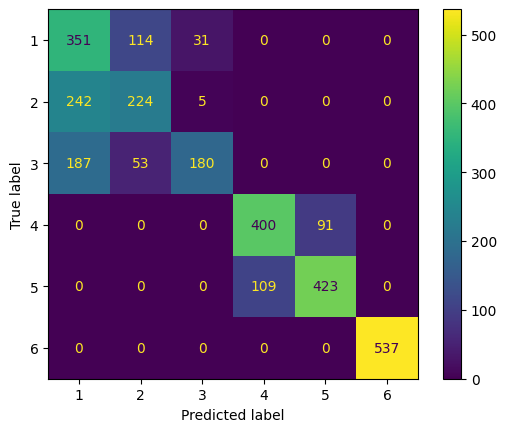

CPU times: user 342 ms, sys: 83.4 ms, total: 426 ms
Wall time: 335 ms


In [31]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42,
                               ccp_alpha=melhor_ccp_2
                              ).fit(X_train, y_train)
print(pd.DataFrame(data=clf_2.get_params(),
                   index=pd.Index(data=['Valor'],
                                  name='Parâmetro')
                  ).T,
      '\n')

print('Acurácia da árvore na base de testes:',
      clf_2.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf_2,
                                      X=X_test,
                                      y=y_test)
plt.show()